In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Formatting describe()
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Load cleaned_movies into DataFrame
movies_df = pd.read_csv('movies_final.csv')
#movies_df.head()

In [3]:
# Drop Unnamed column
movies_df = movies_df.loc[:,~movies_df.columns.str.contains('^Unnamed')]
#movies_df.describe()

# Functions

### Recommended: Column Count Descriptive Stats

In [4]:
#Obtain column value descriptive stats to determine count parameters
#Insert 1. 'column' in quotes 2. minimum quantile of dataframe to include
def count_cutoff(column, min):
    print(f"Top {min*100: .1f}% of {column} appearances in the movie dataframe")
    cutoff_df = movies_df[movies_df[column].map(movies_df[column].value_counts()) \
                    >= movies_df[column].value_counts().quantile(min)][column].value_counts()
    print(cutoff_df)
    print("\nSum and Percent Total of Dataframe")
    print(cutoff_df.sum())
    print(cutoff_df.sum() / 7412 * 100)
    print(f"\nAll {column} Count Descriptive Stats and Boxplot")
    print(movies_df[column].value_counts().describe())
    movies_df[column].value_counts().to_frame().boxplot(vert=False)
    plt.show()

## Dataframe Adjustments by Column Values Count
Recommend Using count_cutoff first to determine min/max

### Adjust Category Count Range by Raw Count

In [5]:
#Categorical variable reduction by value_count.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances (inclusive) 3. maximum movie apperances (inclusive)
#Returns a dataframe
def reduce_rawCount_df(column, min, max):
    df = movies_df[movies_df[column].map(movies_df[column].value_counts()) >= min]
    df = df[df[column].map(df[column].value_counts()) <= max]
    return df

### Adjust Category Count Range by Quantile

In [6]:
#Categorical variable reduction by value_count.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances by quantile (inclusive) 3. maximum movie apperances by quantile (inclusive)
#Returns a dataframe
def reduce_quantileCount_df(column, min, max):
    df = movies_df[movies_df[column].map(movies_df[column].value_counts()) >= movies_df['genre'].value_counts().quantile(min)]
    df = df[df[column].map(df[column].value_counts()) <= movies_df['genre'].value_counts().quantile(max)]
    return df

## Dataframe Category Adjustment by Score

### Adjust Median Category Score Range by Quantile

In [7]:
#Categorical variable reduction by median_rating.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances (inclusive) 3. maximum movie apperances (inclusive)
#Returns a dataframe
def reduce_median_df(df, column, min, max):
    column_medians = df.groupby([column]).median()['score']
    new_df = df[df[column].map(df.groupby([column]).median()['score']) >= column_medians.quantile(min)]
    new_df2 = new_df[new_df[column].map(new_df.groupby([column]).median()['score']) <= column_medians.quantile(max)]
    return new_df2

## Descriptive Statistics Analysis

### Categorical Ordered by Count

In [8]:
#insert dataframe and 'column' in quote
def cat_count(df, column):   
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    #Put the values in a list
    column_values_list = column_counts.index.to_list()
    
    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)
    
    #Bargraph of column counts
    width = 15
    maximum = column_counts_df['Count'].max()
    if maximum < 15:
        width = maximum
    length = len(column_values_list)
    
    column_bar = column_counts_df.plot.barh(figsize = (width * .5, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')
    plt.gca().invert_yaxis()

    #Add counts to bar graph
    for i, v in enumerate(column_counts):
        column_bar.text(v , i , str(v),
            color = 'black', fontweight = 'bold')
    
    plt.show()
    
    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    plt.gca().invert_yaxis()
    ax.grid()
    # Save the figure.

    plt.show()

    print(f'All {column} Descriptive Statistics')
    print(movies_df.groupby([column]).mean()['score'].describe())

### Categorical Ordered by Median Score

In [9]:
#insert dataframe and 'column' in quote
def cat_median(df, column):   
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    column_counts_df = column_counts_df.reset_index()
    #Get Medians
    median_df = df.groupby([column]).median()[['score']]

    #Merge
    merged_df = column_counts_df.merge(median_df, left_on='index', right_on=f'{column}')
    sorted_df = merged_df.sort_values(by='score')
    final_df = sorted_df.set_index('index')

    #Put the values in a list
    column_values_list = final_df.index.to_list()

    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)

    #Bargraph of column counts
    width = 20
    maximum = column_counts_df['Count'].max()
    if maximum < 15:
        width = maximum
    length = len(column_values_list)
    
    length = len(column_values_list)
    column_bar = final_df[['Count']].plot.barh(figsize = (width * .5, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')

    #Add counts to bar graph
    for i, v in enumerate(sorted_df['Count']):
        column_bar.text(v , i , str(v),
            color = 'black', fontweight = 'bold')

    plt.show()

    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    ax.grid()
    # Save the figure.

    plt.show()

    print(f'All {column} Descriptive Statistics')
    print(movies_df.groupby([column]).mean()['score'].describe())

### Numeric Ordered by Median

In [10]:
#insert 1. dataframe 2. 'column' in quotes 3/4. min/max display quantile in decimals (ex: .xx) 
def num_desc(df, column, x_min, x_max):
    
    # Create a box-and-whisker plot for the urban cities ride count.
    fig, ax = plt.subplots()
    ax.boxplot(movies_df[column], labels=[""],vert=False)
    # Add the title, y-axis label and grid.
    ax.set_title(column, fontsize=20)
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    
    ax.grid()
    plt.show()
    
    # Plot actual vs. predicted rating
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(df[column], df['score'],)
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    plt.title(f'{column} versus Score',fontsize=20)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)

    ax.grid()
    plt.show()
    
    print(f'All {column} Descriptive Statistics')
    print(df[column].describe())

# Summary of Functions

In [11]:
#Obtain column value descriptive stats to determine count parameters
#Insert 1. 'column' in quotes 2. minimum quantile of dataframe to include
#count_cutoff(column, min_quantile)

### DataFrame Adjustments

In [ ]:
##Adjustments by Count
#count_df =  reduce_rawCount_df('column', min_count, max_count)
#count_df = reduce_quantileCount_df('column', count_quantile_min, count__quantile_max)

#Adjustments by Category Median Score
#median_df = reduce_median_df('column', quantile_min, quantile_max)

### Descriptive Stats

In [ ]:
#Ordered by 1.Categorical Count 2. Categorical Median 3. Numeric Median
###NOTE: Numeric variables are not naturally binned and so are not described by count
#1. cat_count(df, 'column')
#2. cat_median(df, 'column')
#3. num_desc(df, 'column', percentile_min, percentile_max)

### Variables

In [ ]:
##Categorical
# rating
# genre
# year
# director
# writer
# star
# country
# company

##Numeric
# votes
# gross
# runtime

# Presentation Analysis

### Score (for context)

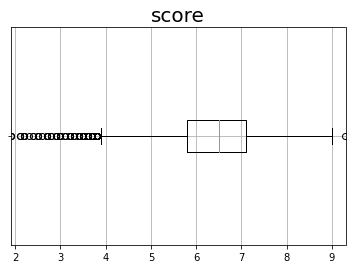

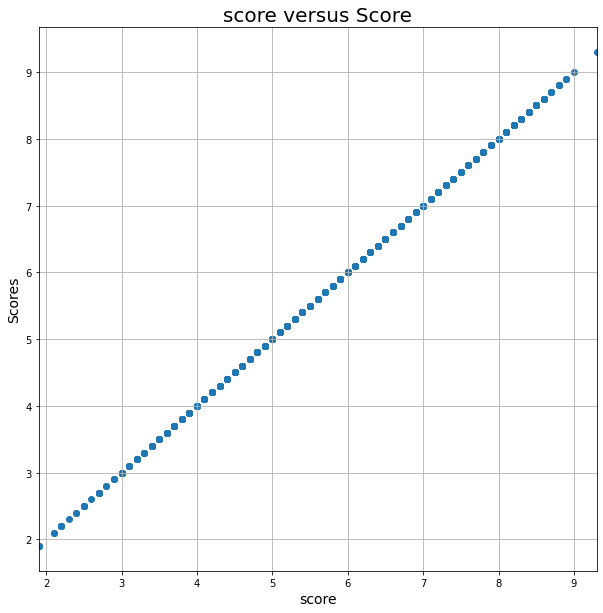

All score Descriptive Statistics
count   7,412.00
mean        6.40
std         0.96
min         1.90
25%         5.80
50%         6.50
75%         7.10
max         9.30
Name: score, dtype: float64


In [26]:
num_desc(movies_df, 'score', 0, 1)

### Genre

Top  0.0% of genre appearances in the movie dataframe
Comedy       2182
Action       1666
Drama        1439
Crime         536
Biography     429
Adventure     419
Animation     331
Horror        304
Fantasy        42
Mystery        20
Thriller       12
Family         10
Romance         8
Sci-Fi          8
Western         3
Music           1
Sport           1
Musical         1
Name: genre, dtype: int64

Sum and Percent Total of Dataframe
7412
100.0

All genre Count Descriptive Stats and Boxplot
count      18.00
mean      411.78
std       660.07
min         1.00
25%         8.00
50%        31.00
75%       426.50
max     2,182.00
Name: genre, dtype: float64


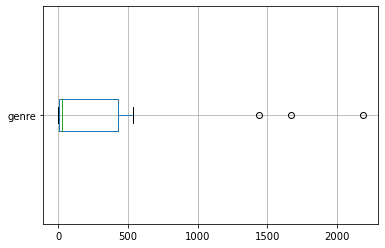

In [57]:
count_cutoff("genre", 0)

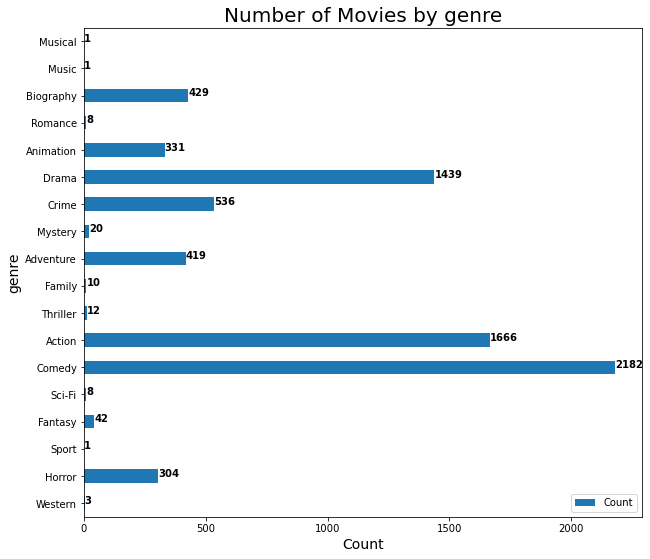

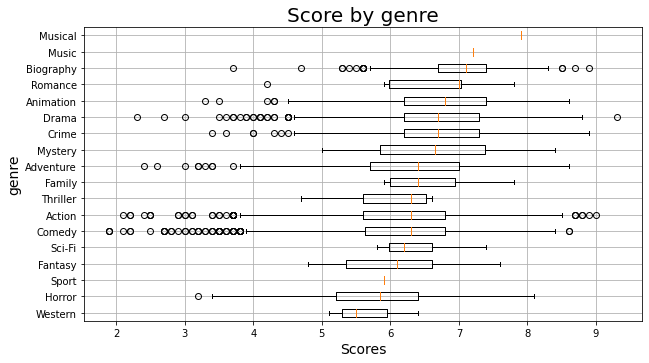

All genre Descriptive Statistics
count   18.00
mean     6.47
std      0.55
min      5.67
25%      6.09
50%      6.44
75%      6.69
max      7.90
Name: score, dtype: float64


In [59]:
cat_median(movies_df, 'genre')

### Company

In [ ]:
#count_cutoff("company", 0)

Top  93.0% of company appearances in the movie dataframe
Universal Pictures               376
Warner Bros.                     332
Columbia Pictures                332
Paramount Pictures               319
Twentieth Century Fox            240
                                ... 
Palace Pictures                    5
Vision PDG                         5
Weintraub Entertainment Group      5
Alive Films                        5
Bona Film Group                    5
Name: company, Length: 200, dtype: int64

Sum and Percent Total of Dataframe
4672
63.03291958985429

All company Count Descriptive Stats and Boxplot
count   2,242.00
mean        3.31
std        17.10
min         1.00
25%         1.00
50%         1.00
75%         2.00
max       376.00
Name: company, dtype: float64


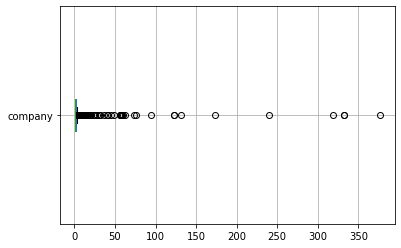

In [38]:
count_cutoff("company", .93)

In [12]:
#Adjust dataframe to remove less than 4 movies
company_df =  reduce_rawCount_df('company', 5, 9999)
#Second Adjustment to top 3% of movies by median rating
company_df2 = reduce_median_df(company_df, 'company', .97, 1)

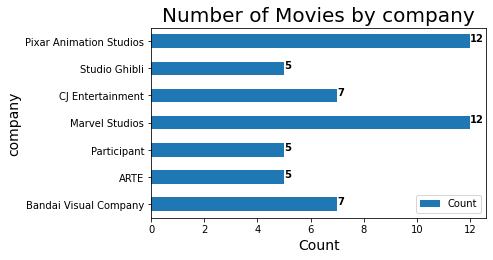

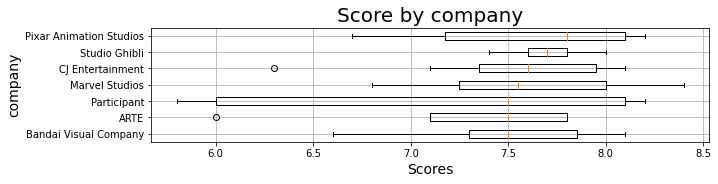

All company Descriptive Statistics
count   2,242.00
mean        6.43
std         0.95
min         1.90
25%         5.90
50%         6.50
75%         7.10
max         8.60
Name: score, dtype: float64


In [13]:
cat_median(company_df2, 'company')

## Extra Analysis

### Actor

Top  87.0% of star appearances in the movie dataframe
Nicolas Cage         43
Robert De Niro       41
Tom Hanks            41
Denzel Washington    37
Bruce Willis         34
                     ..
Bill Pullman          5
Cillian Murphy        5
Treat Williams        5
Frances McDormand     5
Kevin Hart            5
Name: star, Length: 368, dtype: int64

Sum and Percent Total of Dataframe
4076
54.99190501888829

All star Count Descriptive Stats and Boxplot
count   2,652.00
mean        2.79
std         4.30
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        43.00
Name: star, dtype: float64


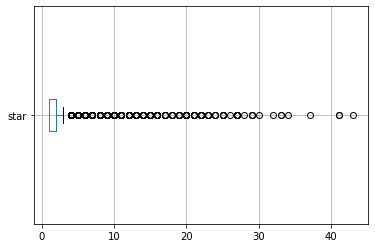

In [14]:
count_cutoff("star", .87)

In [15]:
reduce_rawCount_df('star', 5, 999)['score'].describe()

count   4,076.00
mean        6.46
std         0.85
min         1.90
25%         5.90
50%         6.50
75%         7.00
max         9.30
Name: score, dtype: float64

In [16]:
reduce_rawCount_df('star', 0, 4)['score'].describe()

count   3,336.00
mean        6.32
std         1.08
min         1.90
25%         5.70
50%         6.40
75%         7.10
max         8.70
Name: score, dtype: float64

In [ ]:
#Note: The descriptive stats for those appearing in 5+ films is about the same as <5, doesnt seem to make much difference

### Gross Revenue

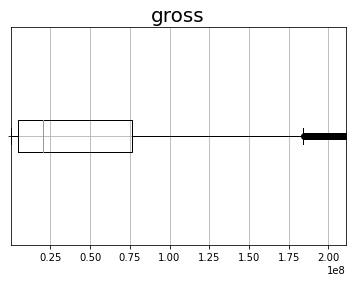

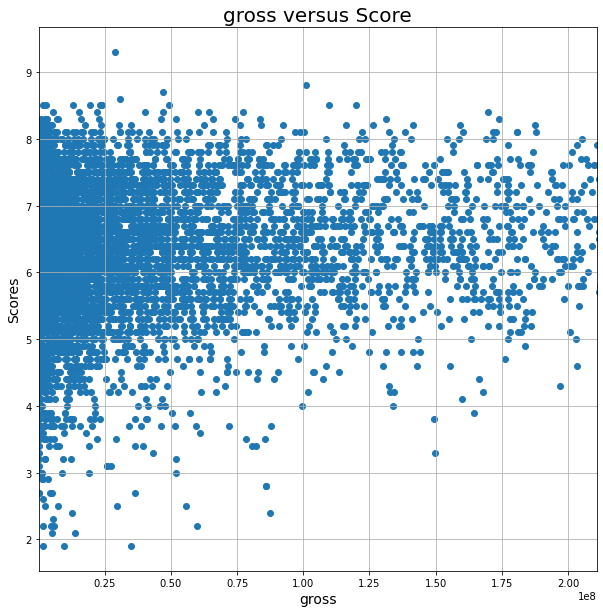

All gross Scores Descriptive Statistics
count           7,412.00
mean       78,993,552.55
std       166,216,386.05
min               309.00
25%         4,633,887.75
50%        20,403,521.50
75%        76,442,306.75
max     2,847,246,203.00
Name: gross, dtype: float64


In [16]:
#outlier reduction in visuals
num_desc(movies_df, 'gross', 0, .9)

### Runtime

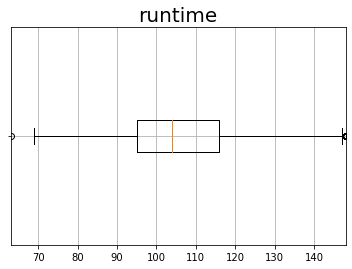

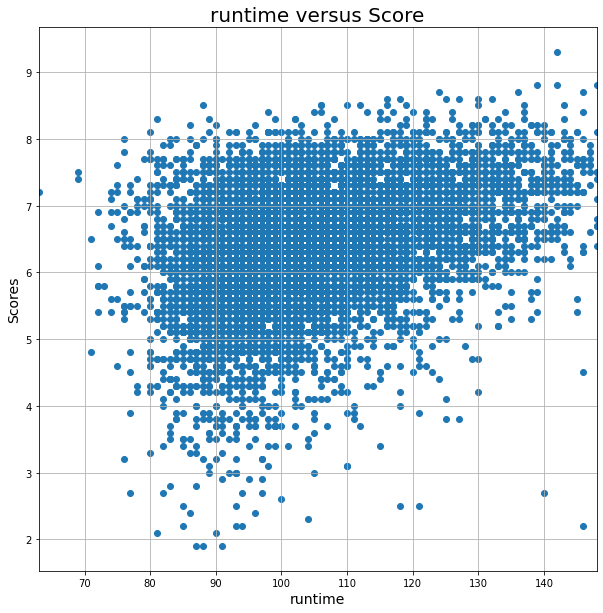

All runtime Scores Descriptive Statistics
count   7,412.00
mean      107.45
std        18.52
min        63.00
25%        95.00
50%       104.00
75%       116.00
max       366.00
Name: runtime, dtype: float64


In [19]:
#outlier reduction in visuals
num_desc(movies_df, 'runtime', 0, .97)

# Presentation Script


Slide 1:
Im touching on the statistical analysis which was a honed attempt at investigating our data in the context of score in order to provide meaning to the different variables impact.  In particular I want to focus on two of our initial questions.  Which you can see right here along with an example function we used to parse the data

Slide 2:
	1. So before the analysis a couple important considerations came up 
	A. So median score was an important measurement.  
	But Median by movie or median by column value?
	For instance do we look at all the highest scoring movies and see who started/directed/made them?  
	Or do we get the median for each star/director/etc. and rank them?
	
	Maybe a movie industry expert would think a big star producing low rated films they earn income from is fine if theyre producing big hits, and it shouldn't count against them.
	We went with latter, bc when assessing a star or we didn’t want to drop their low films. 
	
	
	B. A second consideration is count.  We can rank movies by median score, but is a studio that produces 5 films with a median score of 8.5 better than a studio producing 300 films with a median score of 8.4?
	Certain practical considerations of especially low counts also mattered if there was a large range of values.
	
	So Median and Count  [also more of a census than sample analysis]

	C. And the last thing was simply navigating the dataset, particularly of outliers.  The nature of the dataset is that theres large ranges, maybe 1000 studios producing 1 film and 1 studio producing 1000.  Sort of a cross-section of the last two, and an acknowledgement of the special care needed when comparing even within a category.


Slide 3:
	• With those considerations in mind, we created a few additional tools in pandas to parse the data.  Id love to go deeper into these but basically we needed the ability to judge how much of the dataframe the top values in a category took up.
	• We needed a way to adjust the dataframe based on count and median score, and lastly a function that provided descriptive statistics for our category and its comparison with score.
	• Numeric and Categorical

Slide 4:
	• Speaking of score, just wanted to touch on the values here.  You can see 50% of values are between 5.8 and 7.1 out of 10, so very center heavy, people like scoring the the middle.  That can mean little fluctuations in the center may matter more in a statistical sense, though I think if its too small in a practical sense your average movie goer may not care as much.

Slide 5:
	• So that leads us into our first question, which genre produces the highest rated movies.  In this case the amount of categories was small so we could fit them all into our boxplots, and these are ranked by median.  Of course as we talked about center isnt the be-all end-all, so next to it we have their matching count.  So here are the results we can see.
		○ Musical/Music and Biography had the highest score by median
		○ However Comedy Action and Drama make up ~75% of the data
		○ Of these 3, Drama stands above the others, which from our assumptions is the winner.
	
		
Slide 6:
	• And now genre.  So before the results wanted to discuss an adjustment.  On reviewing count. We can see huge disparity in the amount of films produced by studio.  If we want a studio to have produced at least 5 movies, that’s only 7% of the total amount of studios.  That 7% produced 63% of films.  Quartile 3 is 2 films, so there wasn’t a reliable quantile cutoff, so we went with the 5 movie count cutoff for our analysis

Slide 7:
	• And we have the results here.  Again ranked by median, and you can compare with the amount of films produced.  And we see here some familiar studios, and a few out of country.  So based on our assumptions these are the best studios given the data.

And now Caroline will get to our last question on the ml model